<h3>Aravind Harikrishnan - <i>20BDS0020</i></h3>
<h3>VIT Vellore</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv("books.csv")

In [3]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [4]:
books.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
NonEnglish                     int64
dtype: object

<h3><b>Answers</b></h3>

<h5>Q1: How many rows and columns are there in books.csv dataset?</h5>

In [5]:
books.shape

(399, 24)

<h5>Q2: How many books do not have an original title?</h5>

In [6]:
sum(books["original_title"].isnull())

36

<h5>Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.</h5>

In [7]:
books.dropna(subset='original_title',axis=0).book_id.nunique()

363

<h5>Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?</h5>

In [12]:
books.average_rating.mean()

3.9837844611528817

<h5>Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.</h5>

In [11]:
len(books.loc[books.original_publication_year==2000,'original_publication_year'])

8

<h5>Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.</h5>

In [10]:
books.title[books.work_ratings_count.idxmax()]

'The Diary of a Young Girl'

<h5>Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.</h5>

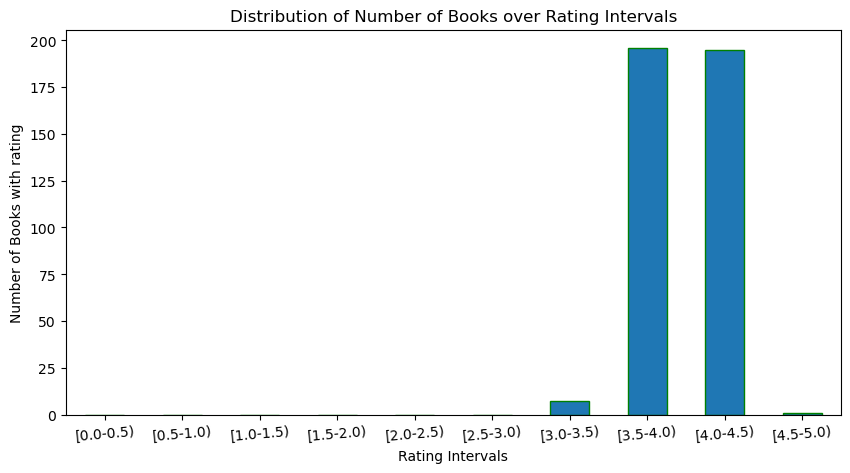

In [9]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.00001]
labels = [f'[{i:.1f}-{i+0.5:.1f})' for i in bins[:-1]]
intervals = pd.cut(books['average_rating'], bins=bins, labels=labels, include_lowest=True).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 5)) 
intervals.plot(kind='bar', edgecolor='green', ax=ax)
plt.xlabel('Rating Intervals')
plt.xticks(rotation=5)
plt.ylabel('Number of Books with rating')
plt.title('Distribution of Number of Books over Rating Intervals')
plt.show()